# Modelling - Prohet

---

# Contents

- [1.0 Arima Model](#1.0-ARIMA-Model)
- [2.0 Daily Data](#2.0-Daily-Data)
    - [1.1 Load Data](#2.1-Load-Data)
    - [1.2 Train Test Split](#2.2-Train-Test-Split)

In [4]:
# !pip install fbprophet

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar

from fbprophet import Prophet

In [6]:
pd.set_option('display.max_columns', None)

---

# 1.0 Prophet Model

The Arima model has 3 components:

+ Differencing Step - I - Integrated - Check for stationarity
+ Autoregressive Piece - AR - long term trends
+ Moving Average Piece - MA - Modelling sudden fluctuations

Each part has input into the model P,D,Q. I will use the previous Dickey Fuller 

+ D is the order of differencing we found using the Augmented Dickey-Fuller test.
+ P is the number of autoregressive terms in our model. PACF is used to estimate this.
+ Q is to do with looking at the moving average.
    + If PACF has a sharp cut off and lag-1 for the ACF is negative choose q to be the lag in the ACF before cut off.
    + If PACF does not have a sharp cut off or lag -1 ACF is not negative choose q = 0

Therefore based on the charts before I will use:
    
    + p = 1
    + d = 1
    + q = 0
    
However I will use auto_arima to help decide.

---

## 1.1 Load Data

In [10]:
daily = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/resampled/daily.csv', 
                    index_col='date', parse_dates=True)

In [11]:
daily_pattern = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/targets/daily_pattern.csv', 
                           parse_dates=True)

In [12]:
daily = daily[['close']]

In [26]:
daily.shape

(5045, 2)

In [13]:
daily.columns

Index(['close'], dtype='object')

In [15]:
daily.reset_index(level=0, inplace=True)

In [19]:
daily.rename(columns={'date':'ds','close':'y'}, inplace=True)

In [20]:
daily.head()

,ds,y
0,2000-05-30,0.9302
1,2000-05-31,0.9377
2,2000-06-01,0.9315
3,2000-06-02,0.9443
4,2000-06-05,0.9463


In [21]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5045 non-null   datetime64[ns]
 1   y       5045 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 79.0 KB


In [22]:
m = Prophet()

In [23]:
m.fit(daily)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=30, freq='B')

In [25]:
future

,ds
0,2000-05-30
1,2000-05-31
2,2000-06-01
3,2000-06-02
4,2000-06-05
...,...
5070,2020-02-05
5071,2020-02-06
5072,2020-02-07
5073,2020-02-10


In [27]:
forecast = m.predict(future)

In [28]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-05-30,0.910627,0.865856,0.966248,0.910627,0.910627,0.004394,0.004394,0.004394,-0.001345,-0.001345,-0.001345,0.005739,0.005739,0.005739,0.0,0.0,0.0,0.915021
1,2000-05-31,0.910559,0.864674,0.963014,0.910559,0.910559,0.004903,0.004903,0.004903,-0.001193,-0.001193,-0.001193,0.006096,0.006096,0.006096,0.0,0.0,0.0,0.915461
2,2000-06-01,0.910490,0.867146,0.965919,0.910490,0.910490,0.005516,0.005516,0.005516,-0.000932,-0.000932,-0.000932,0.006448,0.006448,0.006448,0.0,0.0,0.0,0.916007
3,2000-06-02,0.910422,0.864097,0.966571,0.910422,0.910422,0.005487,0.005487,0.005487,-0.001301,-0.001301,-0.001301,0.006789,0.006789,0.006789,0.0,0.0,0.0,0.915910
4,2000-06-05,0.910218,0.863158,0.966461,0.910218,0.910218,0.005900,0.005900,0.005900,-0.001765,-0.001765,-0.001765,0.007665,0.007665,0.007665,0.0,0.0,0.0,0.916118


In [29]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [30]:
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2000-05-30,0.865856,0.966248,0.915021
1,2000-05-31,0.864674,0.963014,0.915461
2,2000-06-01,0.867146,0.965919,0.916007
3,2000-06-02,0.864097,0.966571,0.915910
4,2000-06-05,0.863158,0.966461,0.916118
...,...,...,...,...
5070,2020-02-05,1.102822,1.198181,1.149384
5071,2020-02-06,1.101439,1.196117,1.149725
5072,2020-02-07,1.099350,1.198352,1.149405
5073,2020-02-10,1.096497,1.198474,1.148879


In [36]:
forecast[-150:-1]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4925,2019-07-17,1.150009,1.108577,1.212233,1.150009,1.150009,0.009141,0.009141,0.009141,-0.001193,-0.001193,-0.001193,0.010334,0.010334,0.010334,0.0,0.0,0.0,1.159151
4926,2019-07-18,1.150036,1.108630,1.212605,1.150036,1.150036,0.009499,0.009499,0.009499,-0.000932,-0.000932,-0.000932,0.010431,0.010431,0.010431,0.0,0.0,0.0,1.159535
4927,2019-07-19,1.150063,1.109916,1.210220,1.150063,1.150063,0.009205,0.009205,0.009205,-0.001301,-0.001301,-0.001301,0.010506,0.010506,0.010506,0.0,0.0,0.0,1.159268
4928,2019-07-22,1.150144,1.109379,1.207718,1.150144,1.150144,0.008846,0.008846,0.008846,-0.001765,-0.001765,-0.001765,0.010611,0.010611,0.010611,0.0,0.0,0.0,1.158990
4929,2019-07-23,1.150171,1.111641,1.210748,1.150171,1.150171,0.009266,0.009266,0.009266,-0.001345,-0.001345,-0.001345,0.010610,0.010610,0.010610,0.0,0.0,0.0,1.159437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,2020-02-04,1.155459,1.100030,1.194480,1.155459,1.155459,-0.006333,-0.006333,-0.006333,-0.001345,-0.001345,-0.001345,-0.004989,-0.004989,-0.004989,0.0,0.0,0.0,1.149126
5070,2020-02-05,1.155486,1.102822,1.198181,1.155486,1.155486,-0.006101,-0.006101,-0.006101,-0.001193,-0.001193,-0.001193,-0.004909,-0.004909,-0.004909,0.0,0.0,0.0,1.149384
5071,2020-02-06,1.155513,1.101439,1.196117,1.155513,1.155513,-0.005787,-0.005787,-0.005787,-0.000932,-0.000932,-0.000932,-0.004856,-0.004856,-0.004856,0.0,0.0,0.0,1.149725
5072,2020-02-07,1.155540,1.099350,1.198352,1.155540,1.155540,-0.006135,-0.006135,-0.006135,-0.001301,-0.001301,-0.001301,-0.004834,-0.004834,-0.004834,0.0,0.0,0.0,1.149405


In [43]:
forecast['ds']= pd.to_datetime(forecast['ds'])

In [45]:
pd.plotting.register_matplotlib_converters()

(733773.0, 737466.0)

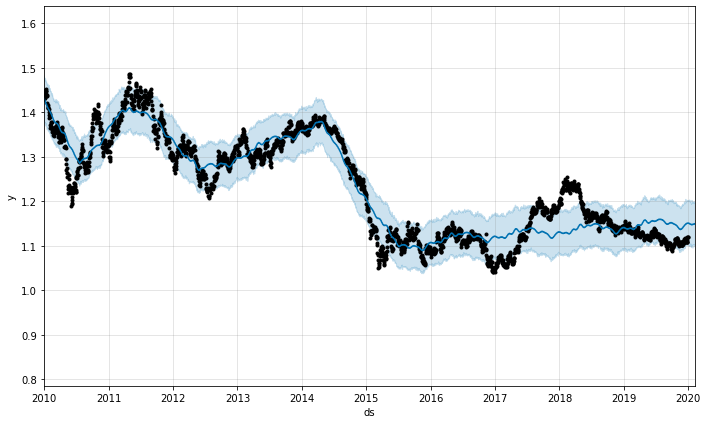

In [49]:
m.plot(forecast);
plt.xlim('2010-01-01','2020-02-11')

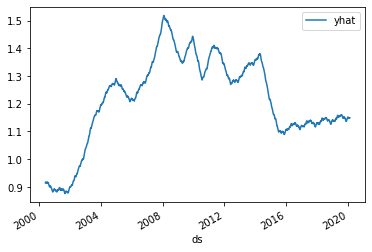

In [51]:
forecast.plot(x='ds', y='yhat')

---

## 1.2 Train Test Split

In [65]:
# Test 1 date out
daily.loc[daily['ds'] == daily_pattern.loc[10]['pattern_end']].index[0]

895

In [57]:
daily.head()

,ds,y
0,2000-05-30,0.9302
1,2000-05-31,0.9377
2,2000-06-01,0.9315
3,2000-06-02,0.9443
4,2000-06-05,0.9463


In [58]:
daily.loc[daily['ds'] <= '2004-01-28 00:00:00']

,ds,y
0,2000-05-30,0.9302
1,2000-05-31,0.9377
2,2000-06-01,0.9315
3,2000-06-02,0.9443
4,2000-06-05,0.9463
...,...,...
891,2004-01-22,1.2707
892,2004-01-23,1.2587
893,2004-01-26,1.2464
894,2004-01-27,1.2597


In [59]:
train_test = daily.loc[daily['ds'] <= '2004-2-28 00:00:00']

In [60]:
train_test

,ds,y
0,2000-05-30,0.9302
1,2000-05-31,0.9377
2,2000-06-01,0.9315
3,2000-06-02,0.9443
4,2000-06-05,0.9463
...,...,...
913,2004-02-23,1.2531
914,2004-02-24,1.2679
915,2004-02-25,1.2513
916,2004-02-26,1.2439


In [66]:
# Set for testing
train = train_test.iloc[:896]
test = train_test.iloc[896:]

In [67]:
start=len(train)
end=len(train)+len(test)-1
start, end

(896, 917)

In [68]:
def train_test_plot(train, test):
    plt.figure(figsize=(16, 8))
    plt.plot(train, c='blue')
    plt.plot(test, c='orange');

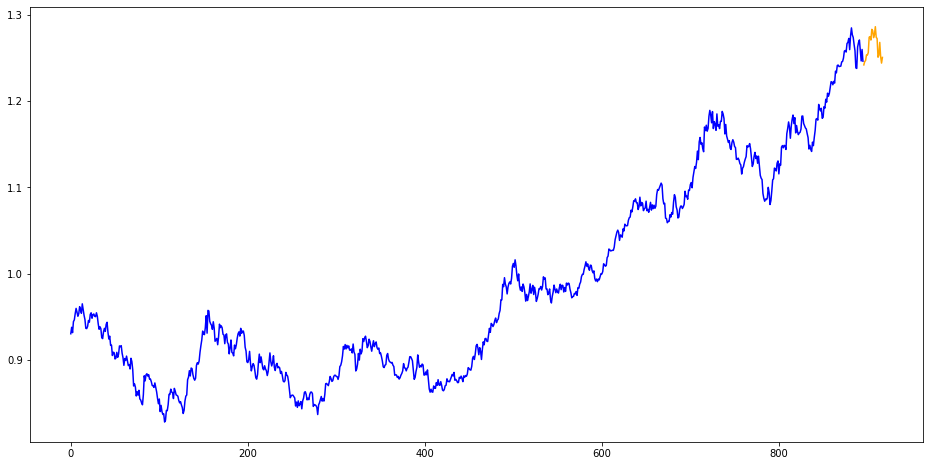

In [69]:
# This plot confirms that our train test split makes sense
train_test_plot(train['y'], test['y'])

In [70]:
## Create model

In [71]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=30, freq='B')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-05-30,0.922828,0.938607,0.970137,0.922828,0.922828,0.032162,0.032162,0.032162,0.000173,0.000173,0.000173,0.031989,0.031989,0.031989,0.0,0.0,0.0,0.954991
1,2000-05-31,0.923182,0.939153,0.971137,0.923182,0.923182,0.031299,0.031299,0.031299,-0.000487,-0.000487,-0.000487,0.031786,0.031786,0.031786,0.0,0.0,0.0,0.954481
2,2000-06-01,0.923535,0.939875,0.970171,0.923535,0.923535,0.031498,0.031498,0.031498,-0.000098,-0.000098,-0.000098,0.031596,0.031596,0.031596,0.0,0.0,0.0,0.955033
3,2000-06-02,0.923889,0.940792,0.970447,0.923889,0.923889,0.031956,0.031956,0.031956,0.000541,0.000541,0.000541,0.031415,0.031415,0.031415,0.0,0.0,0.0,0.955845
4,2000-06-05,0.924949,0.938917,0.970583,0.924949,0.924949,0.030087,0.030087,0.030087,-0.000769,-0.000769,-0.000769,0.030856,0.030856,0.030856,0.0,0.0,0.0,0.955037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2004-03-04,1.261926,1.266646,1.305049,1.254309,1.269756,0.023743,0.023743,0.023743,-0.000098,-0.000098,-0.000098,0.023841,0.023841,0.023841,0.0,0.0,0.0,1.285669
922,2004-03-05,1.262430,1.268469,1.307271,1.254507,1.270636,0.024142,0.024142,0.024142,0.000541,0.000541,0.000541,0.023601,0.023601,0.023601,0.0,0.0,0.0,1.286572
923,2004-03-08,1.263941,1.266634,1.305516,1.253946,1.273720,0.021537,0.021537,0.021537,-0.000769,-0.000769,-0.000769,0.022306,0.022306,0.022306,0.0,0.0,0.0,1.285478
924,2004-03-09,1.264445,1.266169,1.308154,1.253684,1.275062,0.021872,0.021872,0.021872,0.000173,0.000173,0.000173,0.021699,0.021699,0.021699,0.0,0.0,0.0,1.286317


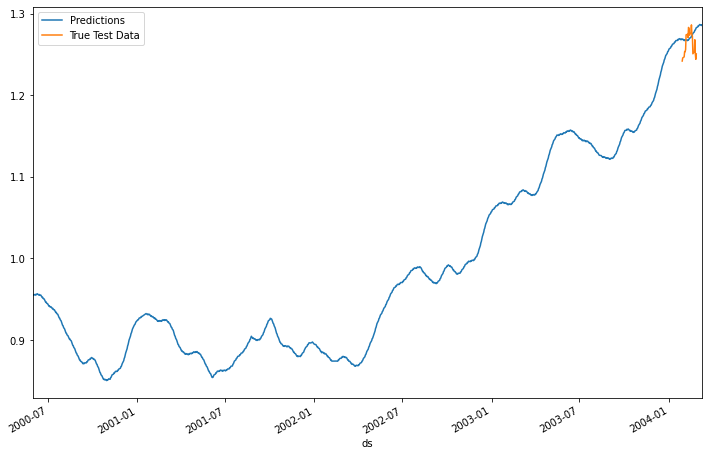

In [80]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions', legend=True, figsize=(12,8), )
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2000-05-30','2004-03-10'))


In [81]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
# 896, 917

In [103]:
# initial

initial = 1.01 * 365
initial = str(initial) + ' days'

initial

'368.65 days'

In [104]:
# period
period = 1.01 * 365
period = str(period) + ' days'
period

'368.65 days'

In [105]:
# horizon
horizon = 1.01 *365
horizon = str(horizon) + ' days'
horizon

'368.65 days'

In [106]:
daily_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 2 forecasts with cutoffs between 2002-01-20 16:48:00 and 2003-01-24 08:24:00


In [107]:
daily_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-01-21,0.878700,0.867852,0.888316,0.8827,2002-01-20 16:48:00
1,2002-01-22,0.876803,0.865309,0.888176,0.8883,2002-01-20 16:48:00
2,2002-01-23,0.873395,0.862941,0.884540,0.8777,2002-01-20 16:48:00
3,2002-01-25,0.869151,0.858391,0.879274,0.8662,2002-01-20 16:48:00
4,2002-01-28,0.858648,0.847183,0.869335,0.8625,2002-01-20 16:48:00
...,...,...,...,...,...,...
489,2004-01-22,1.160874,0.779427,1.598711,1.2707,2003-01-24 08:24:00
490,2004-01-23,1.161240,0.773635,1.597382,1.2587,2003-01-24 08:24:00
491,2004-01-26,1.157181,0.766004,1.601951,1.2464,2003-01-24 08:24:00
492,2004-01-27,1.156746,0.757620,1.606415,1.2597,2003-01-24 08:24:00


In [108]:
performance_metrics(daily_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,39 days 15:36:00,0.001475,0.038410,0.034568,0.035500,0.030288,0.102041
1,40 days 15:36:00,0.001519,0.038969,0.035430,0.036265,0.031737,0.081633
2,41 days 15:36:00,0.001564,0.039543,0.036182,0.036897,0.032342,0.081633
3,42 days 07:12:00,0.001675,0.040929,0.037605,0.038534,0.032966,0.061224
4,43 days 07:12:00,0.001776,0.042142,0.038558,0.039764,0.034043,0.061224
...,...,...,...,...,...,...,...
441,366 days 15:36:00,0.128004,0.357777,0.298002,0.275535,0.098457,0.510204
442,367 days 07:12:00,0.133908,0.365934,0.307115,0.284244,0.460170,0.489796
443,367 days 15:36:00,0.129535,0.359910,0.299539,0.276486,0.098457,0.510204
444,368 days 07:12:00,0.135634,0.368285,0.308857,0.285313,0.460170,0.489796


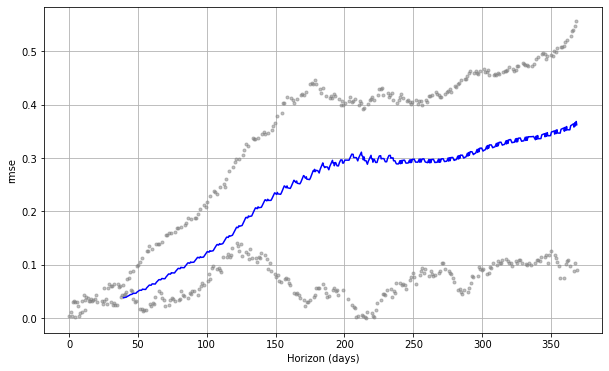

In [110]:
plot_cross_validation_metric(daily_cv, metric='rmse');

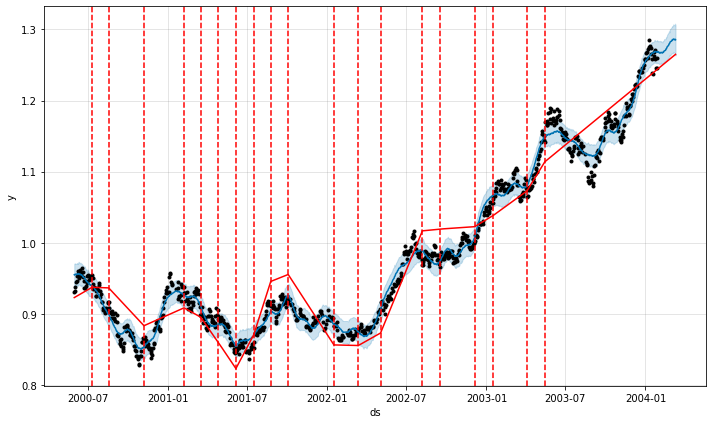

In [112]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)